# WATER POTABILITY DATASET ANALYSIS

Emmanuel Mosquera Casas & Nicolas Carreño Perea
=
References: https://www.kaggle.com/adityakadiwal/water-potability/code

## Extraccion de informacion

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
df_water = pd.read_csv("../Datasets/water-quality/water_potability.csv")

In [3]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df_water.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [62]:
df_water.isnull().sum()

ph             0
Hardness       0
Solids         0
Chloramines    0
Sulfate        0
Potability     0
dtype: int64

## Preprocesamiento de la informacion

In [20]:
#Fill values of pH
df_water['ph']=df_water['ph'].fillna(0)
pot_pos = df_water[df_water['Potability']==1]
pot_neg = df_water[df_water['Potability']==0]

def imputage(ph, potability):
    if potability==0 and ph==0:
        ph = pot_neg['ph'].mean()
    elif potability==1 and ph==0:
        ph = pot_pos['ph'].mean()
    return ph

df_water['ph'] = df_water.apply(lambda x: imputage(x['ph'], x['Potability']), axis=1)

In [21]:
#Fill values of Sulfate
df_water['Sulfate']=df_water['Sulfate'].fillna(0)
pot_pos = df_water[df_water['Potability']==1]
pot_neg = df_water[df_water['Potability']==0]

def imputage(sulfate, potability):
    if potability==0 and sulfate==0:
        sulfate = pot_neg['Sulfate'].mean()
    elif potability==1 and sulfate==0:
        sulfate = pot_pos['Sulfate'].mean()
    return sulfate

df_water['Sulfate'] = df_water.apply(lambda x: imputage(x['Sulfate'], x['Potability']), axis=1)

In [22]:
#Fill values of Trihalomethanes
df_water['Trihalomethanes']=df_water['Trihalomethanes'].fillna(0)
pot_pos = df_water[df_water['Potability']==1]
pot_neg = df_water[df_water['Potability']==0]

def imputage(trihalomethanes, potability):
    if potability==0 and trihalomethanes==0:
        trihalomethanes = pot_neg['Trihalomethanes'].mean()
    elif potability==1 and trihalomethanes==0:
        trihalomethanes = pot_pos['Trihalomethanes'].mean()
    return trihalomethanes

df_water['Trihalomethanes'] = df_water.apply(lambda x: imputage(x['Trihalomethanes'], x['Potability']), axis=1)

In [23]:
df_water = df_water.drop(columns = ['Organic_carbon','Turbidity','Trihalomethanes','Conductivity'])

## Visualizacion de los datos

Matriz de correlacion

<AxesSubplot:>

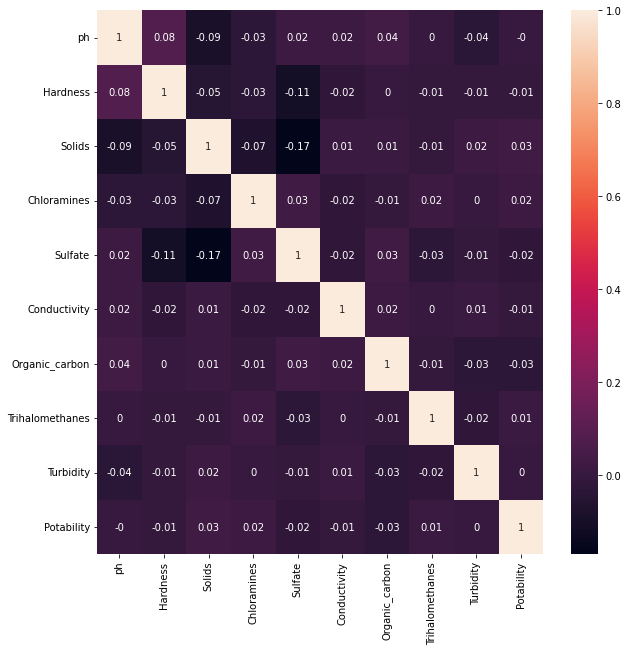

In [19]:
plt.subplots(figsize=(10, 10))
correlation_matrix = df_water.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

Grafico pastel

0    0.60989
1    0.39011
Name: Potability, dtype: float64


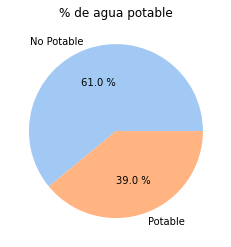

In [133]:
datos = df_water.Potability.value_counts(normalize=True)
colors = sns.color_palette('pastel')[0:5]
print(datos)
plt.pie(datos, labels=["No Potable","Potable"], autopct="%0.1f %%",colors = colors)
plt.title("% de agua potable")
plt.show()

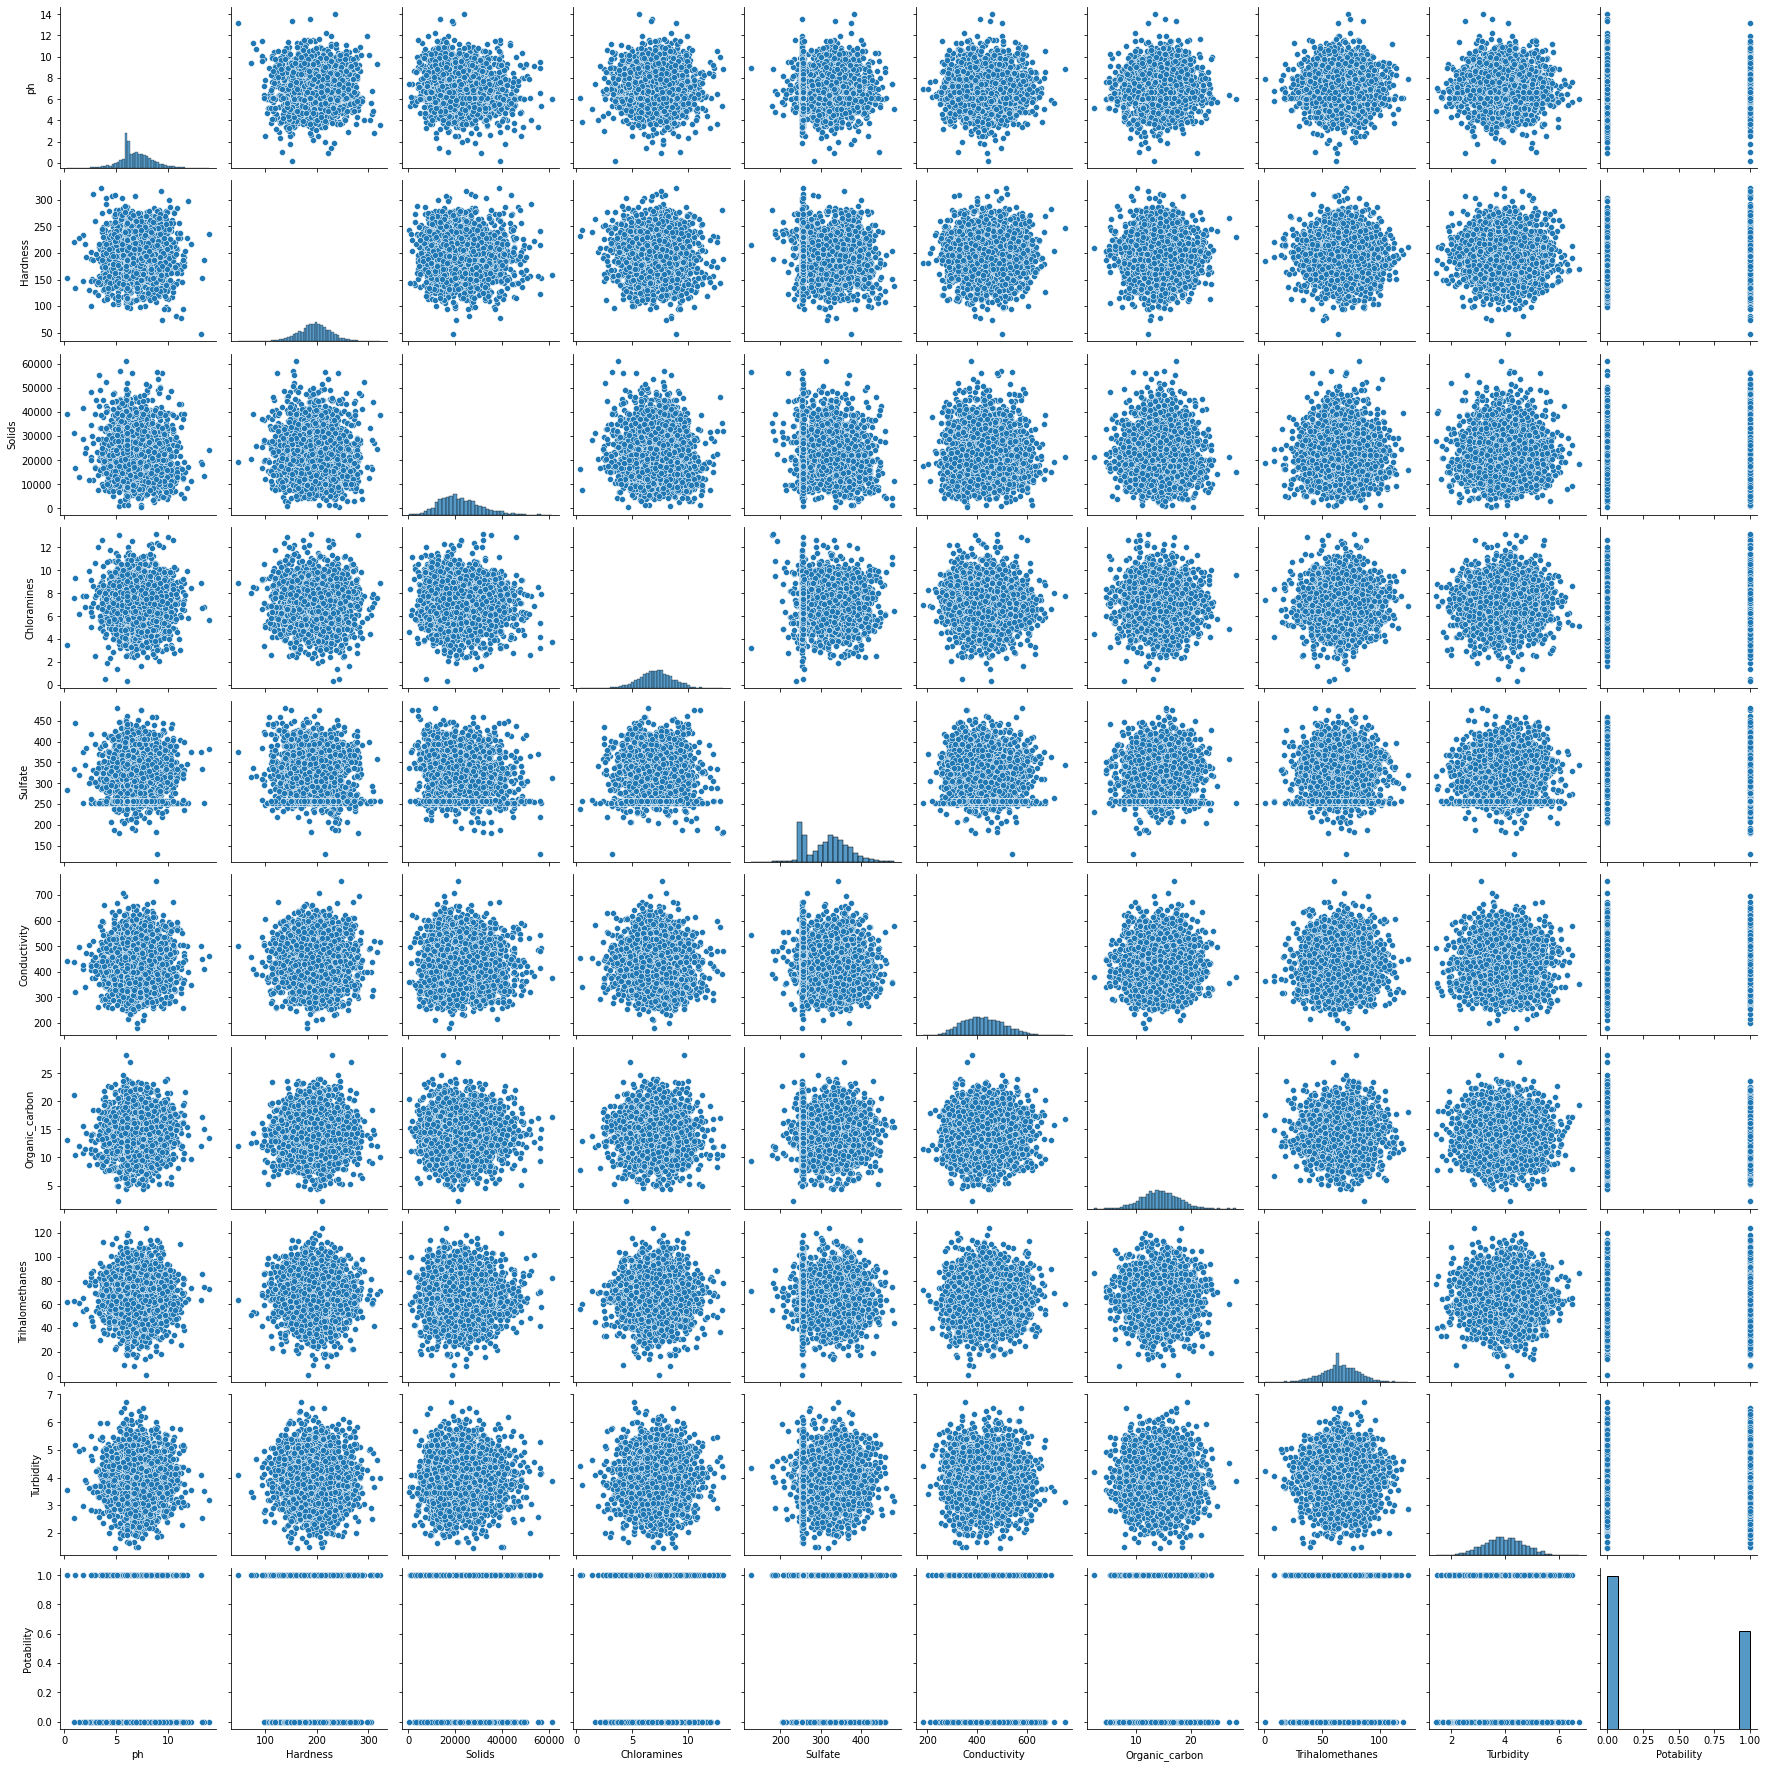

In [59]:
sns.pairplot(df_water)

## Regresion Logistica

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logRegr = LogisticRegression()

In [25]:
x = df_water.drop(columns=['Potability'])
y = df_water['Potability']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [70]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.6111
Accuracy score:  0.6052


[[397   0]
 [259   0]]


<AxesSubplot:>

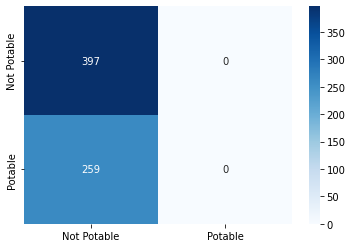

In [67]:
from sklearn.metrics import confusion_matrix
conf_mtrx = confusion_matrix(y_test,y_pred)
print(conf_mtrx)

group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mtrx.flatten()]
group_percentages = ["{0:.2f}".format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

class_names = ['Not Potable', 'Potable']
dataf = pd.DataFrame(conf_mtrx,index=class_names, columns=class_names)
sns.heatmap(dataf,annot=True,fmt='',cmap='Blues')

## Arbol de decision

In [79]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.8676
Accuracy score:  0.7561


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [89]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

<function matplotlib.pyplot.show(close=None, block=None)>

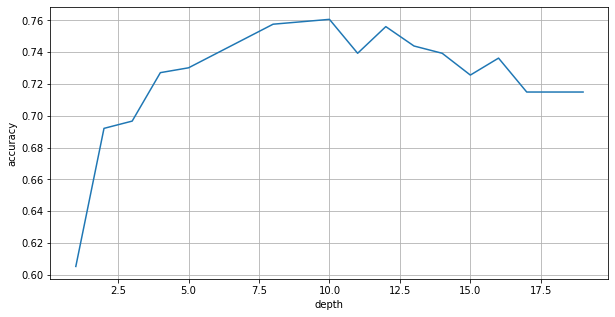

In [90]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

## Support Vector Machine

In [44]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.6111
Accuracy score:  0.6052


## KNN Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.7164
Accuracy score:  0.5183


[[275 122]
 [194  65]]


<AxesSubplot:>

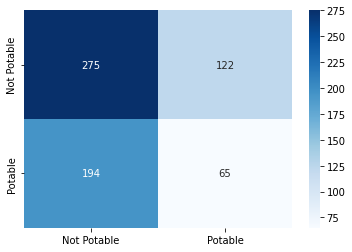

In [65]:
from sklearn.metrics import confusion_matrix
conf_mtrx = confusion_matrix(y_test,y_pred)
print(conf_mtrx)

group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mtrx.flatten()]
group_percentages = ["{0:.2f}".format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

class_names = ['Not Potable', 'Potable']
dataf = pd.DataFrame(conf_mtrx,index=class_names, columns=class_names)
sns.heatmap(dataf,annot=True,fmt='',cmap='Blues')

## RESULTADOS COMPARATIVA MODELOS

In [91]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)


,Model,Score,Accuracy
1,Decision Tree,0.8676,0.7561
3,KNN,0.7164,0.5183
0,Logistic Regression,0.6111,0.6052
2,Support Vector Machine,0.6111,0.6052


Segun los resultados obtenidos el modelo de ML que mejor se ajusta al dataset es el de Arbol de decision con una profundidad optima de 15, ya que presenta el menor sobreajuste, y los puntajes de train y test mas altos sin un alto uso computacional. Ya que a diferencia del KNN, no se encuentra una ganancia significativa al aumentar el numero de Neighbors.